<a href="https://colab.research.google.com/github/hamiin47/OB-session_M/blob/main/Assign_0307.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4.5 규제가 있는 선형 모델**

4.5.1 릿지 회귀

릿지 회귀는 규제가 추가된 선형 회귀 버전이다.(규제항이 비용 함수에 추가된다)

하이퍼파라마티 알파는 모델을 얼맘나 많이 규제할지 조절한다.
- 알파 = 0 이면 릿지 회귀는 선형 회귀와 같아진다.
- 알파가 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 된다.

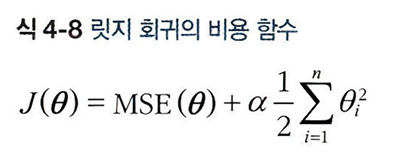

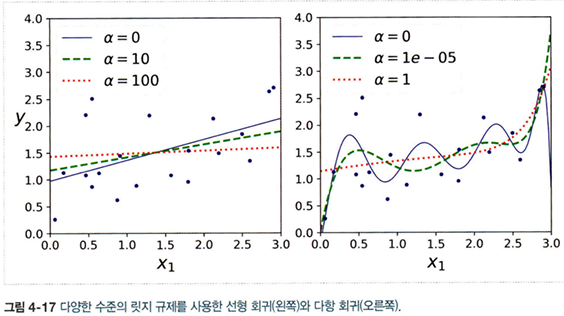

왼쪽 그래프는 평번한 릿지 모델을 사용해 선형적인 예측을 만들었으며, 오른쪽 그래프는 PolynomialFeatures(degree=10)을 사용해 먼저 데이터를 확장하고 StandardScaler를 사용해 스케일을 조정한 후 릿지 모델을 적용하였다.

- 선형회귀와 마찬가지로 릿지 회귀를 계산하기 위해 정규방정식을 사용할 수도 있고 경사 하강법을 사용할 수도 있다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

m = 100

X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([5.41015767])

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.39907677])

**4.5.2. 라쏘 회귀**

라쏘 회귀는 선형 회귀의 또 다른 규제된 버전이다.

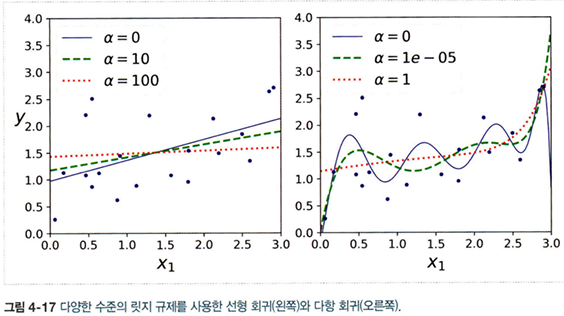

- 두 축은 모델 파라미터 두 개를 나타내고 배경의 등고선은 각기 다른 손실 함수를 나타낸다.
- 왼쪽 위 그래프의 등고선은 축에 가까워지면서 선형적으로 줄어든다.

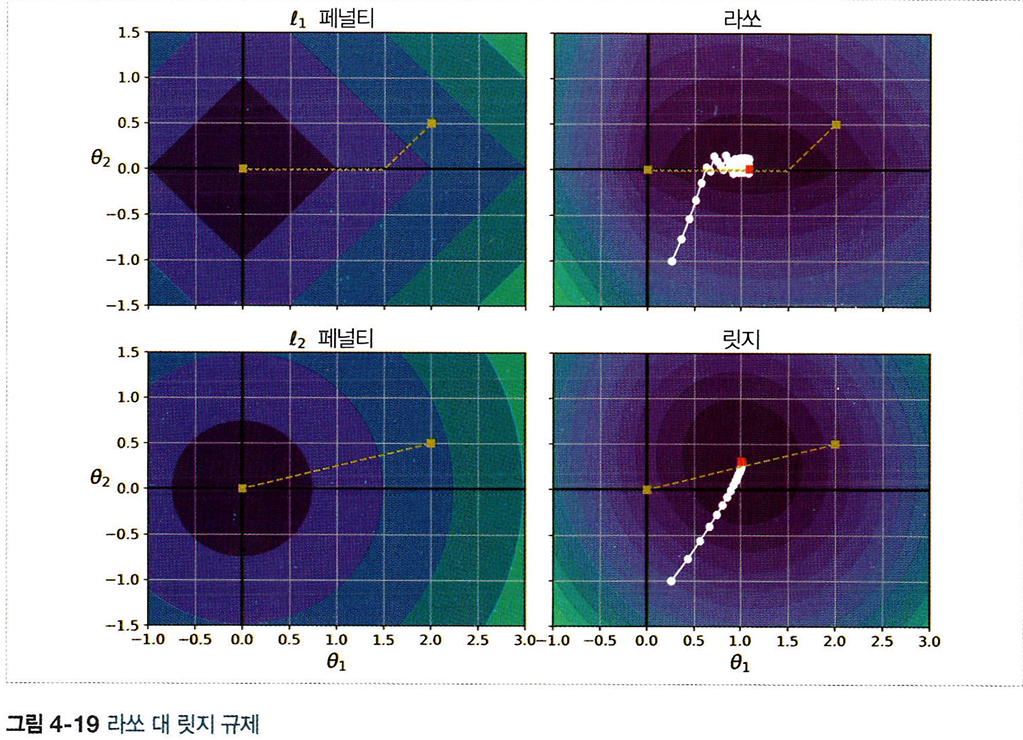

라쏘의 비용함수는 세타=0에서 미분 가능하지 않다.
그러나 세타=0일 때, 서브그레이디언트 벡터g를 사용하면 경사 하강법을 적용하는 데 문제가 없다.

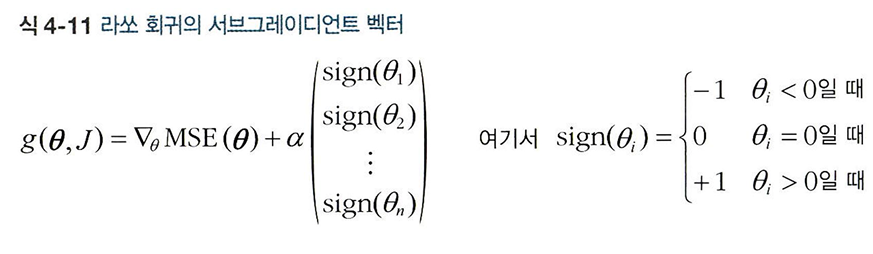

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.36543024])

**4.5.3 엘라스틱넷**

엘라스틱넷은 릿지 회귀와 라쏘 회귀를 절충한 모델이다.

규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율r을 사용해 조절한다.

r=0이면 엘라스틱넷은 릿지 회귀와 같고, r=1이면 라쏘 회귀와 같다.

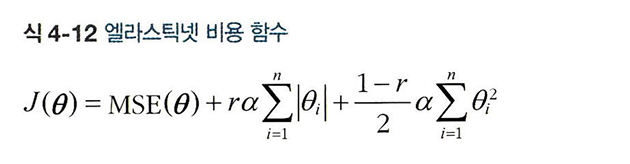

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.3633842])

**4.5.4 조기 종료**

- 경사 하강법과 같은 반복적인 학습 알고리즘을 규제하는 아주 색다른 방식은 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것이다.

- 에포크가 진행됨에 따라 알고리즘이 점차 학습되어 훈련 세트에 대한 예측 에러(RMSE)와 검증 세트에 대한 예측 에러가 줄어든다.

- 그러나 잠시 후 감소하던 검증 에러가 멈추었다가 다시 상승한다. 이는 모델이 훈련 데이터에 과대적합되기 시작하는 것을 의미한다.

- 조기 종료는 검증 에러가 최소에 도달하는 즉시 훈련을 멈추는 것이다.

- 이 규제 테크닉은 매우 효과적이고 간단하다.

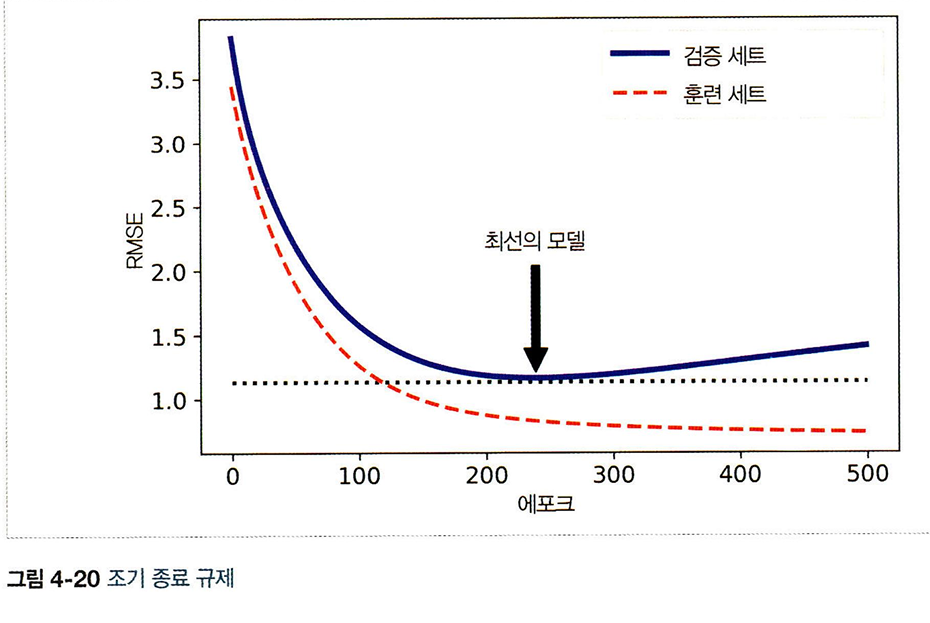

In [ ]:
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

# 데이터 준비
poly_scaler = Pipeline([("poly_features", PolynomialFeatures(degree=90, include_bias=False)), ("std_scaler", StandardScaler())])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train.ravel()) # 훈련을 이어서 진행합니다.
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

# **4.6 로지스틱 회귀**

로지스틱 회귀는 샘플이 특정 클래스에 속할 확률을 추정하는 데 널리 사용된다.

**4.6.1  확률 추정**

- 선형 회귀 모델과 같이 로지스틱 회귀 모델은 입려 ㄱ특성의 가중치 합을 계산한다. 대신 선형 회귀처럼 바로 결과를 출력하지 않고 결괏값의 로지스틱을 출력한다.

- 로지스틱은 0과 1 사이의 값을 출력하는 시그모이드 함수이다.

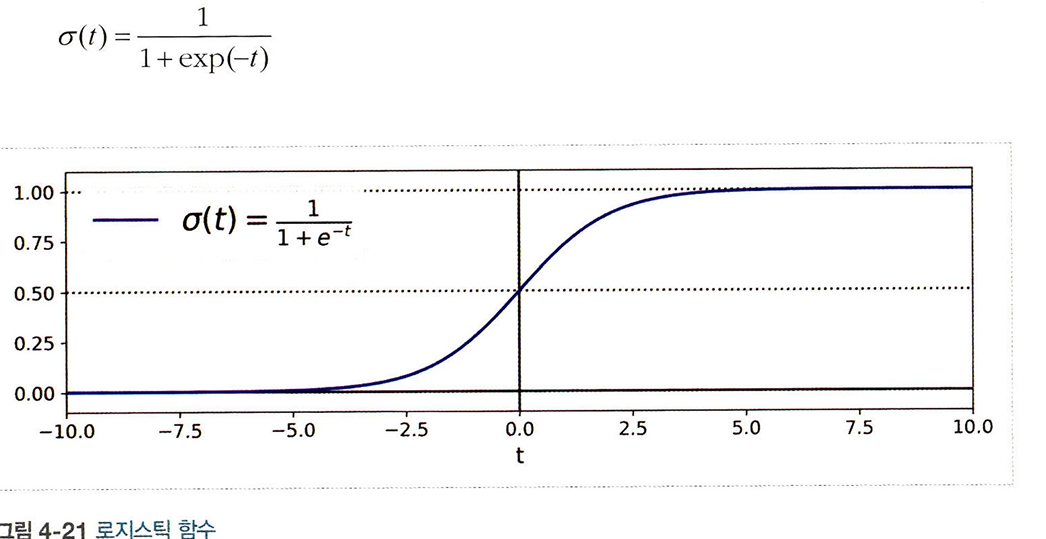

**4.6.2 훈련과 비용 함수**

훈련의 목적은 양성 샘플에 대해서는 높은 확률을 추정하고 음성 샘플에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터를 찾는 것이다.

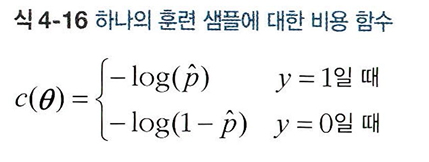

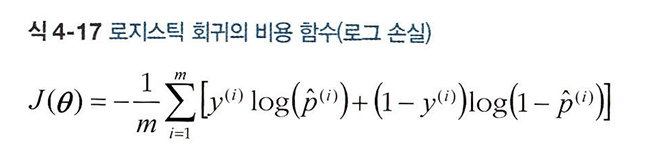

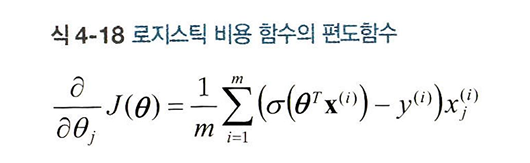

**4.6.3 결정 경계**

붓꽃 데이터셋 사용

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

X = iris["data"][:, 3:] #꽃잎의 너비
y = (iris["target"] == 2).astype(int) #1 Iris-Virginica면 1, 그렇지 않으면 0

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

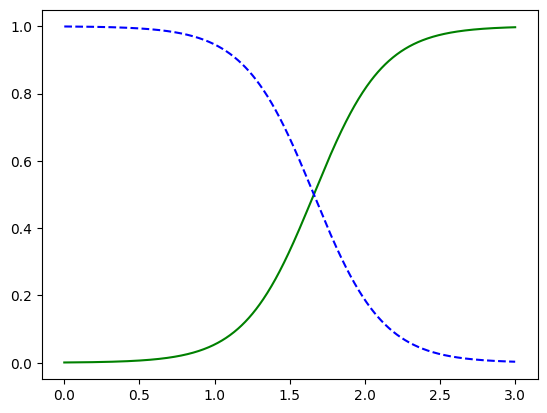

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

- Iris-Verginica의 꽃잎 너비는 1.4~2.5cm에 분포한다. 반면, 다른 붓꽃은 일반적으로 꽃잎 너비가 더 작아 0.1~1.8cm에 분포한다.

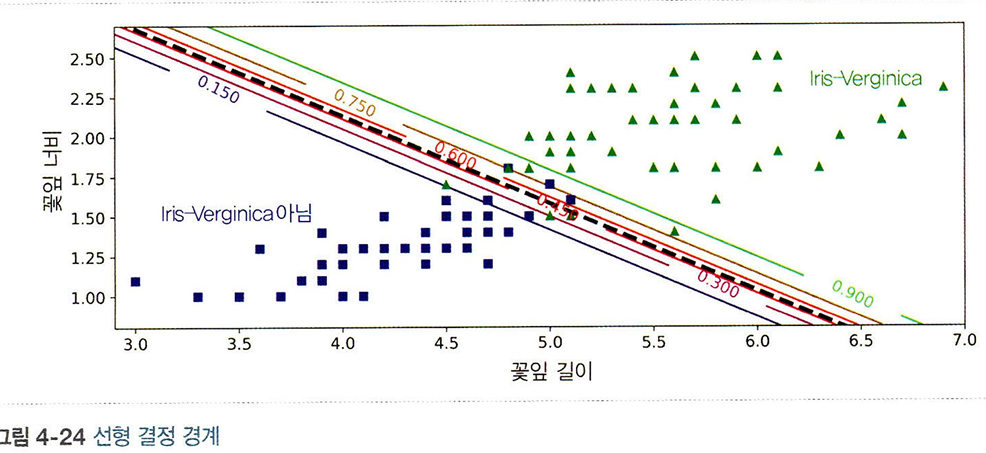

**4.6.4 소프트맥스 회귀**

로지스틱 회귀 모델은 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화될 수 있다.

이를 소프트맥스 회귀 또는 다항 로지스틱 회귀라고 한다.

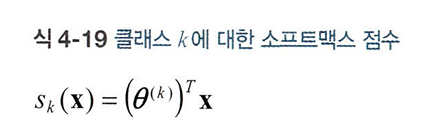

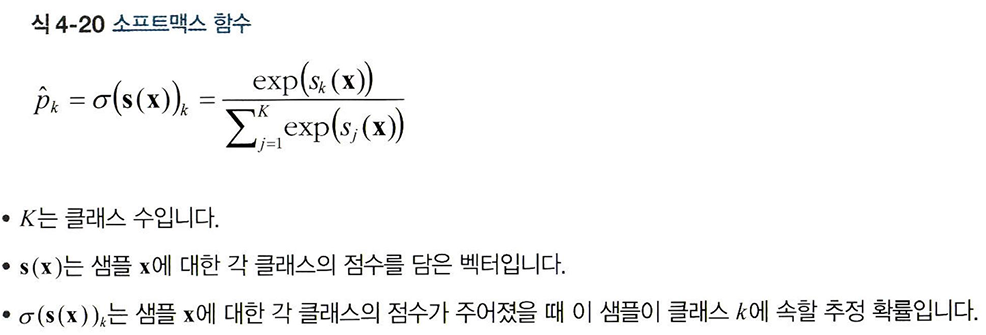

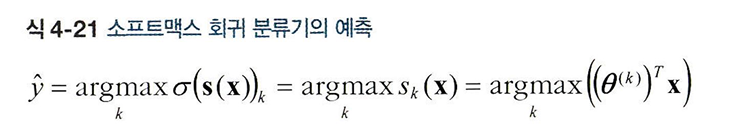

In [ ]:
X = iris["data"][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

In [ ]:
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626375e-07, 5.73689803e-02, 9.42630398e-01]])